<a href="https://colab.research.google.com/github/armine021/C964_Capstone/blob/main/Coupons_by_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coupons by Design

Import libraries, plot in-line, and set style.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interactive
%matplotlib inline
sns.set_style('whitegrid')

Read data file as 'df_raw'

In [2]:
df_raw = pd.read_csv('in-vehicle-coupon-recommendation.csv',index_col=0)

FileNotFoundError: ignored

Check the head of df_raw

In [ ]:
df_raw.head()

,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,,,,,,,,,,,,,,,,,,,,,
No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Check the info() and describe() methods on the data.

In [ ]:
df_raw.info()
# note less than 1% of people answered about 'car'
# note that most columns have the same number of non-null counts, except the frequency questions (Bar, CoffeeHouse, etc.)

<class 'pandas.core.frame.DataFrame'>
Index: 12684 entries, No Urgent Place to Work
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   passenger             12684 non-null  object
 1   weather               12684 non-null  object
 2   temperature           12684 non-null  int64 
 3   time                  12684 non-null  object
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 

In [ ]:
df_raw.describe()
# note that several columns are 0 or 1 answers for yes or no
# note that while temperature is a number, it is only from a selection of 3 values (30, 55, or 80)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Change categorical data to numerical data and attach in a new dataframe 'df_dummies'.

In [ ]:
# values: Rainy, Snowy, Sunny
weather = pd.get_dummies(df_raw['weather'],drop_first=True)

# values: 30, 55, 80
# TODO: rename to freezing, cool, and warm? does this even add value?
temperature = pd.get_dummies(df_raw['temperature'],drop_first=True)

# values: 7AM, 10AM, 2PM, 6PM, 10PM
# TODO: not dropping first as this will be used later for predictions
# TODO: create as 2 categories with method? beforeNoon and afterNoon? does this even add value?
time = pd.get_dummies(df_raw['time'])

# values: Bar, Carryout & Take away, Coffee House, Restaurant(<20), Restaurant(20-50)
# TODO: not dropping first as this will be used later for predictions
coupon = pd.get_dummies(df_raw['coupon'])

# values: 2h, 1d
expiration = pd.get_dummies(df_raw['expiration'],drop_first=True)

Check the info() method on the dummied data to see the newly created columns.

In [ ]:
df_dummies = pd.concat([df_raw,weather,temperature,time,coupon,expiration],axis=1)
df_dummies.info()
df_dummies.columns

<class 'pandas.core.frame.DataFrame'>
Index: 12684 entries, No Urgent Place to Work
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   passenger              12684 non-null  object
 1   weather                12684 non-null  object
 2   temperature            12684 non-null  int64 
 3   time                   12684 non-null  object
 4   coupon                 12684 non-null  object
 5   expiration             12684 non-null  object
 6   gender                 12684 non-null  object
 7   age                    12684 non-null  object
 8   maritalStatus          12684 non-null  object
 9   has_children           12684 non-null  int64 
 10  education              12684 non-null  object
 11  occupation             12684 non-null  object
 12  income                 12684 non-null  object
 13  car                    108 non-null    object
 14  Bar                    12577 non-null  object
 15  CoffeeHouse

Index([            'passenger',               'weather',
                 'temperature',                  'time',
                      'coupon',            'expiration',
                      'gender',                   'age',
               'maritalStatus',          'has_children',
                   'education',            'occupation',
                      'income',                   'car',
                         'Bar',           'CoffeeHouse',
                   'CarryAway',  'RestaurantLessThan20',
            'Restaurant20To50',      'toCoupon_GEQ5min',
           'toCoupon_GEQ15min',     'toCoupon_GEQ25min',
              'direction_same',         'direction_opp',
                           'Y',                 'Snowy',
                       'Sunny',                      55,
                            80,                  '10AM',
                        '10PM',                   '2PM',
                         '6PM',                   '7AM',
                         'Bar',

Rename the duplicate 'Bar' column

In [ ]:
# make a list of the duplicated columns
duplicated_columns_list = []
list_of_all_columns = list(df_dummies.columns)
for column in list_of_all_columns:
    if list_of_all_columns.count(column) > 1 and not column in duplicated_columns_list:
        duplicated_columns_list.append(column)
# append a number to the column name
for column in duplicated_columns_list:
    list_of_all_columns[list_of_all_columns.index(column)] = column + '_1'
    list_of_all_columns[list_of_all_columns.index(column)] = column + '_2'
# rename the columns in the dataframe
df_dummies.columns = list_of_all_columns

MAYBE: Change the temperature column names to be more descriptive (55 to cool55, 80 to warm80).

MAYBE: Change the 2h column name to be more descriptive as 'shortExpiration'.

MAYBE: drop the 800 answers with a blank in 'how many times do you visit x in a month' (6% of responses)

## Pre-processing

Reduce the size of the dataframe by removing columns not currently of interest in a new dataframe 'df_mod'.

In [ ]:
# not dropping coupon to use for heatmap
# not dropping expiration to use for filter
df_mod = df_dummies.drop(['passenger','weather','temperature', 'gender','age','maritalStatus','has_children','education','occupation','car'], axis=1)
df_mod.head()

,time,coupon,expiration,income,Bar_1,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,...,10PM,2PM,6PM,7AM,Bar_2,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),2h
destination,,,,,,,,,,,,,,,,,,,,,
No Urgent Place,2PM,Restaurant(<20),1d,$37500 - $49999,never,never,NaN,4~8,1~3,1,...,0,1,0,0,0,0,0,0,1,0
No Urgent Place,10AM,Coffee House,2h,$37500 - $49999,never,never,NaN,4~8,1~3,1,...,0,0,0,0,0,0,1,0,0,1
No Urgent Place,10AM,Carry out & Take away,2h,$37500 - $49999,never,never,NaN,4~8,1~3,1,...,0,0,0,0,0,1,0,0,0,1
No Urgent Place,2PM,Coffee House,2h,$37500 - $49999,never,never,NaN,4~8,1~3,1,...,0,1,0,0,0,0,1,0,0,1
No Urgent Place,2PM,Coffee House,1d,$37500 - $49999,never,never,NaN,4~8,1~3,1,...,0,1,0,0,0,0,1,0,0,0


## Descriptive Methods

Bar graph to show counts of survey participants per income group

<AxesSubplot:xlabel='income', ylabel='count'>

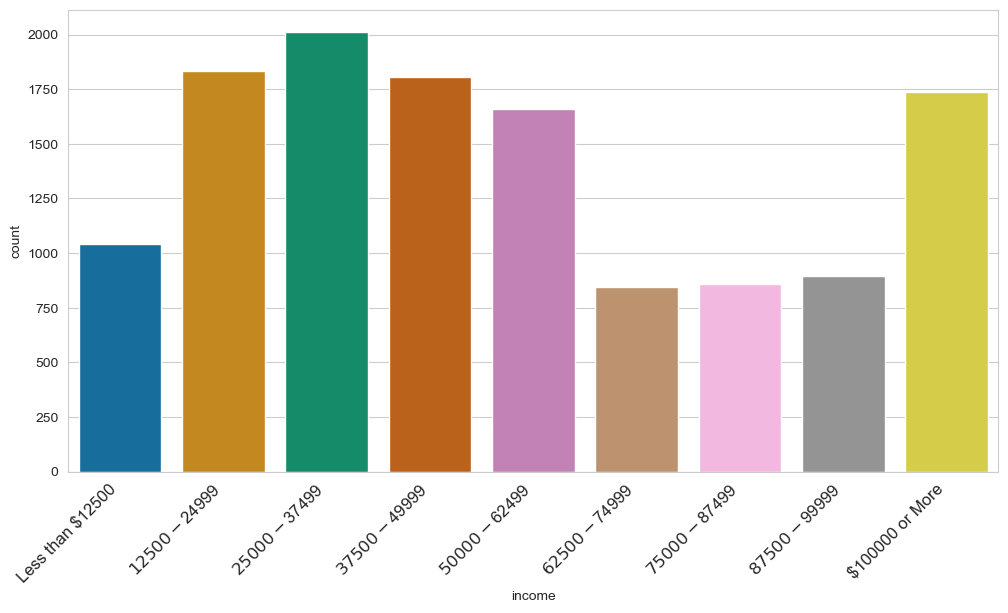

In [ ]:
# define an order for the incomes
incomeOrder = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
plt.figure(figsize=(12,6))
plt.xticks(rotation=45, horizontalalignment='right', fontsize='large')
sns.countplot(x='income',data=df_mod,palette='colorblind',order=incomeOrder)

Heatmap to show when each type of short duration coupon is accepted the most

Step 1: Get the total coupons offered for each type and time combo (ex: Bar coupon offered at 7AM)

In [ ]:
# define an order for the string times
# TODO: could instead change to military time and let it uint8 sort, less readable for 12hr time people
timeOrder = ['7AM', '10AM', '2PM', '6PM', '10PM']

# create a new dataframe which counts how many of each type of coupon ('coupon') is offered at each time of day ('time')
timeTypeOffered = df_mod.groupby(by=['time','coupon']).count()['Y'].unstack()
# timeTypeOffered.columns = ['Bar Offered', 'Carryout & Take away Offered', 'Coffee House Offered', 'Restaurant(<20) Offered', 'Restaurant(20-50) Offered']
# fix the order of times
timeTypeOffered.index = pd.CategoricalIndex(timeTypeOffered.index, categories=timeOrder)
timeTypeOffered.sort_index(level=0, inplace=True)
# check the values
timeTypeOffered.head()

# 'coupon' categories: Bar, Carryout & Take away, Coffee House, Restaurant(<20), Restaurant(20-50)
# TODO: calculate total accepted coupon for each type
# TODO: calculate percentage (accepted/offered) for each type

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
time,,,,,
7AM,487,762,913,429,573
10AM,444,517,899,112,303
2PM,118,218,794,182,697
6PM,566,435,1093,388,748
10PM,402,461,297,381,465


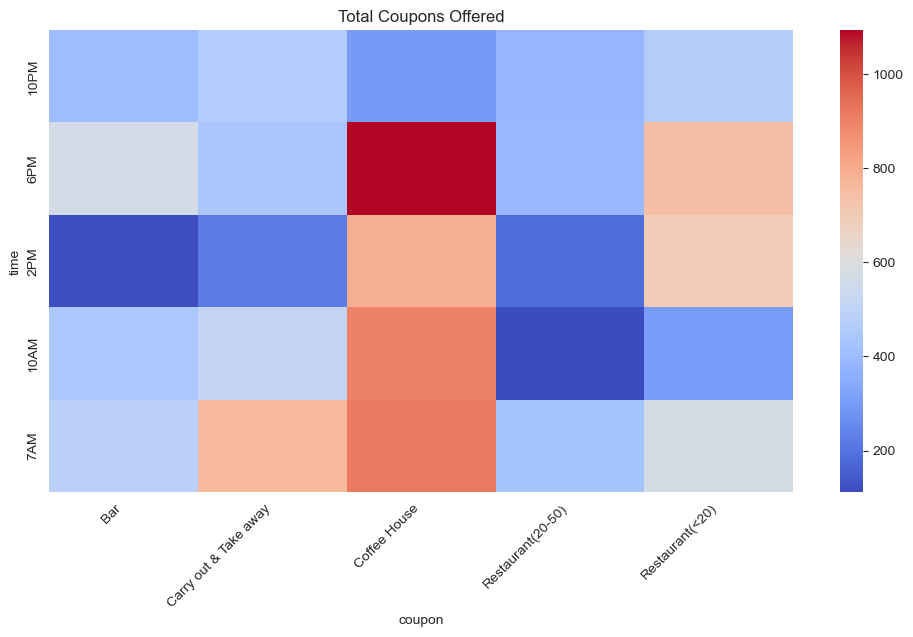

In [ ]:
# create a heatmap with yaxis inverted (default seaborn behavior puts index 0 at the top left and runs down the graph)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45, horizontalalignment='right', fontsize='medium')
plt.title('Total Coupons Offered')
sns.heatmap(timeTypeOffered,cmap='coolwarm').invert_yaxis()

Step 2: Get the total coupons accepted for each type and time combo (ex: Bar coupon offered at 7AM)

In [ ]:
# total = timeType.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
timeTypeAccepted = df_mod.groupby(by=['time','coupon']).sum()['Y'].unstack()
# rename the columns to keep them distinct from the total offered
# timeTypeAccepted.columns = ['Bar Accepted', 'Carryout Accepted', 'Coffee House Accepted', 'Restaurant(<20) Accepted', 'Restaurant(20-50) Accepted']
# fix the order of times
timeTypeAccepted.index = pd.CategoricalIndex(timeTypeAccepted.index, categories=timeOrder)
timeTypeAccepted.sort_index(level=0, inplace=True)
# check the values
timeTypeAccepted.head()

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
time,,,,,
7AM,178,499,407,171,334
10AM,161,363,576,69,215
2PM,40,189,435,98,567
6PM,264,359,451,195,619
10PM,184,350,126,125,235


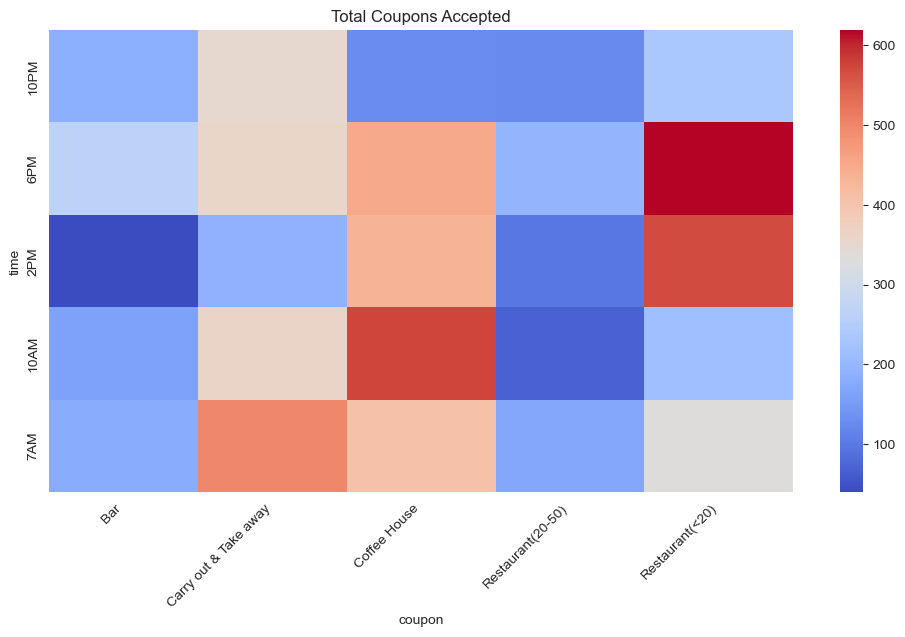

In [ ]:
# create a heatmap with yaxis inverted (default seaborn behavior puts index 0 at the top left and runs down the graph)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45, horizontalalignment='right', fontsize='medium')
plt.title('Total Coupons Accepted')
sns.heatmap(timeTypeAccepted,cmap='coolwarm').invert_yaxis()

Step 3: Calculate the percentage coupons accepted for each type and time combo (ex: Bar coupon offered at 7AM)

In [ ]:
# Example: Bar 7 AM: 161 Accepted out of 444 Offered, 161/444 = 36%
timeTypePercent = (timeTypeAccepted/timeTypeOffered)*100
timeTypePercent.index = pd.CategoricalIndex(timeTypePercent.index, categories=timeOrder)
timeTypePercent.sort_index(level=0, inplace=True)
# Check the values
timeTypePercent.head()

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
time,,,,,
7AM,36.550308,65.485564,44.578313,39.860140,58.289703
10AM,36.261261,70.212766,64.071190,61.607143,70.957096
2PM,33.898305,86.697248,54.785894,53.846154,81.348637
6PM,46.643110,82.528736,41.262580,50.257732,82.754011
10PM,45.771144,75.921909,42.424242,32.808399,50.537634


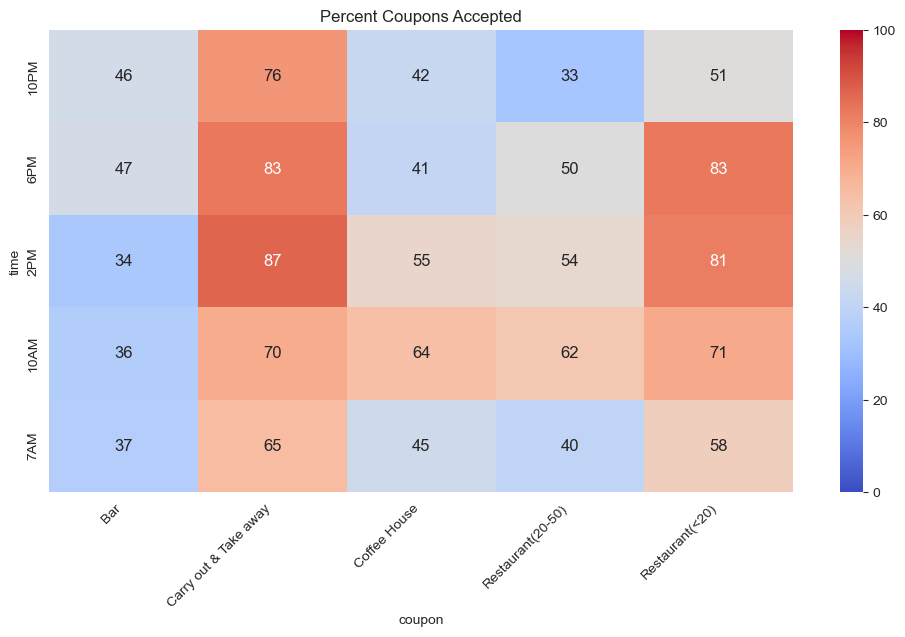

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45, horizontalalignment='right', fontsize='medium')
plt.title('Percent Coupons Accepted')
# adjust the range from 0 to 100 and increase annotation font size
sns.heatmap(timeTypePercent,cmap='coolwarm',vmin=0,vmax=100,annot=True, annot_kws={'fontsize':12}).invert_yaxis()

Bar graph to show accepted versus unaccepted short duration coupons with a series for each type(s) of coupon (bar, low cost restaurant, coffee, etc.)

In [ ]:
# count some column without nulls to find total number of coupons offered
couponOffered = df_mod[df_mod['2h'] == 1].groupby(by=['coupon']).count()['income']
couponAccepted = df_mod[df_mod['2h'] == 1].groupby(by=['coupon']).sum()['Y']
# create the dataframe which will be plotted
couponOutcomes = pd.concat([couponOffered, couponAccepted], axis=1)
couponOutcomes.columns = ['Coupons Offered', 'Coupons Accepted']
couponOutcomes.head()

,Coupons Offered,Coupons Accepted
coupon,,
Bar,461,186
Carry out & Take away,937,622
Coffee House,2227,962
Restaurant(20-50),536,160
Restaurant(<20),1432,844


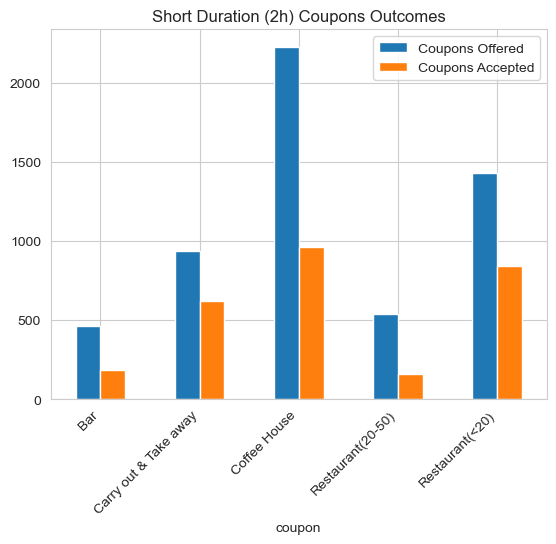

In [ ]:
couponOutcomes.plot(kind='bar')
plt.title('Short Duration (2h) Coupons Outcomes')
plt.xticks(rotation=45, horizontalalignment='right', fontsize='medium')
plt.show()

Define an interactive graph.

In [ ]:
# Make a dropdown to select the coupon duration, or "All"
couponExpiration = widgets.Dropdown(
    options=['All'] + list(df_mod['expiration'].unique()),
    value='All',
    description='Expiration:',
)

# filters the dataframe based on selected coupon duration
def expPlot(couponExpiration):
    df_mod2 = df_mod.copy()
    if couponExpiration != 'All':
        df_mod2 = df_mod2[df_mod2.expiration == couponExpiration]

    # Plot it (only if there's data to plot)
    if len(df_mod2) > 0:
        df_mod2.groupby(['coupon','expiration']).count()['income'].unstack().plot(kind='bar', stacked=True)
        plt.title('Filterable Coupons Offered')
        plt.xticks(rotation=45, horizontalalignment='right', fontsize='medium')
        plt.show();
    else:
        print("No data to show for current selection")

In [ ]:
interactive(expPlot, couponExpiration=couponExpiration)

interactive(children=(Dropdown(description='Expiration:', options=('All', '1d', '2h'), value='All'), Output())…

## Predictive Method

Use K-means clustering to prescribe at what time of day customers would accept any coupon offer at a high rate.

In [ ]:
# create a dataframe limited only to the factors which will be considered for prediction
# df_predict = df_mod[['Bar_2','Carry out & Take away','Coffee House','Restaurant(20-50)','Restaurant(<20)','Y']].copy()
df_predict = df_mod[['7AM','10AM','2PM','6PM','10PM','Y']].copy()
df_predict.reset_index(drop=True, inplace=True)
df_predict.head()

,7AM,10AM,2PM,6PM,10PM,Y
0,0,0,1,0,0,1
1,0,1,0,0,0,0
2,0,1,0,0,0,1
3,0,0,1,0,0,0
4,0,0,1,0,0,0


Use train_test_split to split data into a training set and a testing set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_predict.drop('Y',axis=1),df_predict['Y'],test_size=0.3)

Import KNeighborsClassifier from scikit learn, create a KNN model, and fit it to the training data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

Use the predict method to predict values using your KNN model and X_test.

In [ ]:
pred = knn.predict(X_test)

C:\Users\armin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Evaluate the model using a confusion matrix and classification report.

Confusion Matrix


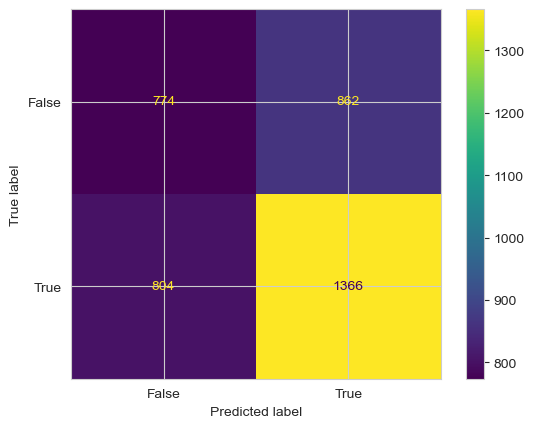

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      1636
           1       0.61      0.63      0.62      2170

    accuracy                           0.56      3806
   macro avg       0.55      0.55      0.55      3806
weighted avg       0.56      0.56      0.56      3806



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print("Confusion Matrix")
confusion_matrix = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# print(confusion_matrix(y_test,pred))
print("Classification Report")
print(classification_report(y_test,pred))

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\armin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\armin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\armin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\armin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\armin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\armin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

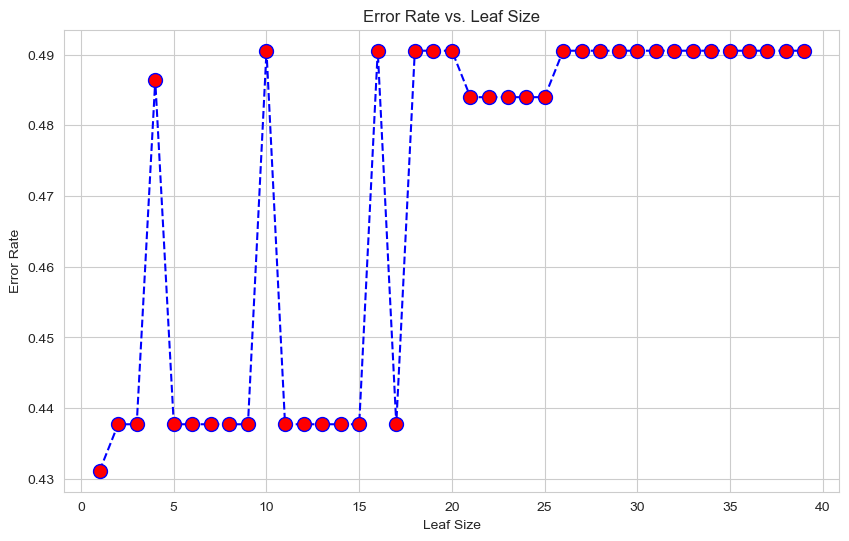

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Leaf Size')
plt.xlabel('Leaf Size')
plt.ylabel('Error Rate')